# Análise de Dados da Vacinação no Recife

In [21]:
import pandas as pd

In [22]:
raw_data = pd.read_csv('vacinados.csv', sep= ';', encoding= 'ISO-8859-1')

In [23]:
raw_data.head()

,cpf,nome,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210114,2,03/04/2021,DRIVE THRU - BIG BOMPREÃO - BOA VIAGEM
1,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,1,13/03/2021,DRIVE THRU GERALDÃO
2,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210093,2,01/04/2021,DRIVE THRU PARQUE DA MACAXEIRA
3,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,1,04/03/2021,DRIVE THRU PARQUE DA MACAXEIRA
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2,04/03/2021,CENTRO DE VACINAÃÃO PARQUE DE EXPOSIÃÃO


# Tratamento dos Dados

### Filtrando os Dados

In [24]:
raw_data.columns.values

array(['cpf', 'nome', 'grupo', 'vacina', 'lote', 'dose', 'data_vacinacao',
       'local_vacinacao'], dtype=object)

In [25]:
selectedColumns = ['cpf', 'grupo', 'vacina', 'dose', 'data_vacinacao']

In [26]:
data = raw_data.filter(items= selectedColumns)

In [27]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,03/04/2021
1,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1,13/03/2021
2,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),2,01/04/2021
3,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),1,04/03/2021
4,***.886.964-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,04/03/2021


### Renomeando Vacinas

In [28]:
data['vacina'].unique()

array(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
       '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '3 - COMIRNATY (PFIZER)',
       ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'], dtype=object)

In [29]:
data['vacina'] = data['vacina'].replace(['1 - CORONAVAC - SINOVAC (BUTANTAN)'], 'CORONAVAC')

In [30]:
data['vacina'] = data['vacina'].replace(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)', ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'], 'CHADOX1NCOV-19')

In [31]:
data['vacina'] = data['vacina'].replace(['3 - COMIRNATY (PFIZER)'], 'COMIRNATY')

In [32]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

In [33]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

### Renomeando os Grupos

In [34]:
data['grupo'].unique()

array(['TRABALHADORES DA SAÃ\x9aDE', 'IDOSOS', 'OUTRAS PRIORIDADES',
       'PESSOAS COM COMORBIDADES', 'TRABALHADORES DA EDUCAÃ\x87Ã\x83O',
       'GRÃ\x81VIDAS E PUÃ\x89RPERAS'], dtype=object)

In [35]:
data['grupo'] = data['grupo'].replace(['PESSOAS COM COMORBIDADES'], 'COMORBIDADES')

In [36]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA SAÃDE'], 'SAÚDE')

In [37]:
data['grupo'] = data['grupo'].replace(['OUTRAS PRIORIDADES'], 'OUTROS')

In [38]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA EDUCAÃ\x87Ã\x83O'], 'EDUCAÇÃO')

In [39]:
data['grupo'] = data['grupo'].replace(['GRÃ\x81VIDAS E PUÃ\x89RPERAS'], 'GRÁVIDAS E PUÉRPERAS')

In [40]:
data['grupo'].unique()

array(['SAÚDE', 'IDOSOS', 'OUTROS', 'COMORBIDADES', 'EDUCAÇÃO',
       'GRÁVIDAS E PUÉRPERAS'], dtype=object)

In [41]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,SAÚDE,CORONAVAC,2,03/04/2021
1,***.457.304-**,SAÚDE,CORONAVAC,1,13/03/2021
2,***.556.154-**,IDOSOS,CORONAVAC,2,01/04/2021
3,***.556.154-**,IDOSOS,CORONAVAC,1,04/03/2021
4,***.886.964-**,SAÚDE,CORONAVAC,2,04/03/2021


# Analisando Queries 

In [50]:
data['dose'].value_counts()

1    357478
2    186628
Name: dose, dtype: int64

<AxesSubplot:>

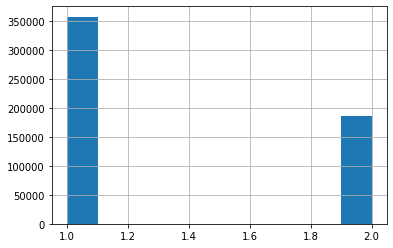

In [53]:
data['dose'].hist()

### É possível notar que poucas pessoas se quer tomara a segunda dose. Essa pandemia vai ser longa por aqui, ein?